In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

In [2]:
theme = "КФУ"
start = 10

In [3]:
search_string = f"https://www.google.com/search?q={theme}&source=lnms&tbm=nws&start={start}"

In [4]:
response = requests.get(search_string)

In [5]:
soup = BeautifulSoup(response.text, 'html.parser')

'<!DOCTYPE html>\n<html lang="ru">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>\n  <title>\n   КФУ - Поиск в Google\n  </title>\n  <script nonce="rK/OJeCPr3fdA91jz9pR0Q==">\n   (function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){\nvar a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()
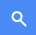
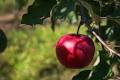
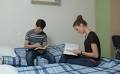
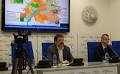

In [6]:
soup.prettify()

In [7]:
news_on_page = soup.find_all("h3", {"class":"zBAuLc"})

In [8]:
headers = []
short_description = []
links = []
sites = []
times = []

for h in news_on_page:
    div = h.previous_element.previous_element.previous_element
    prewiev = div.find_all("div", {"class" : "BNeawe"})[-1]
    spans = prewiev.find_all("span")
    prewiev = str(prewiev)
    for span in spans:
        prewiev = prewiev.replace(str(span), "")
    prewiev = BeautifulSoup(prewiev)
    prewiev = prewiev.find("div").text
    s = str(div.find("a")["href"])
    link_to_new = s[s.find("/url?q=")+len("/url?q="):s.rfind("&sa")]
    site = div.find("a").find_all("div")[1].text
    t = div.find("span").text.replace("\xa0", " ")
    print(h.text)
    print(prewiev)
    print(link_to_new)
    print(site)
    print(t)
    headers.append(h.text)
    short_description.append(prewiev)
    links.append(link_to_new)
    sites.append(site)
    times.append(t)
    print("----------------------------------------------------")

В КФУ объявили день траура 21 сентября
В связи с трауром в КФУ отменили все развлекательные мероприятия и передачи. На всех зданиях университета приспустили флаги.
https://realnoevremya.ru/news/226314-v-kfu-obyavili-den-traura-21-sentyabrya
Реальное время
1 день назад
----------------------------------------------------
В образовательных учреждениях Казани усилили режим ...
В КФУ провели инструктаж с охранниками и усилили пропускной режим. После сегодняшней стрельбы в Пермском государственном национальном...
https://tatarstan24.tv/news/novosti-tatarstana/v-kfu-usilili-propusknoy-rezhim-vo-vsekh-korpusakh
Татарстан 24
2 дня назад
----------------------------------------------------
В вузах Казани усилили меры безопасности после стрельбы в Перми
В КФУ усилили пропускной режим после стрельбы в Пермском университете. Руководство вуза провело дополнительный инструктаж по охранной...
https://rt.rbc.ru/tatarstan/20/09/2021/61485c289a79477e18e23f9a
РБК
1 день назад
----------------------------

In [9]:
news_df = pd.DataFrame()

In [10]:
news_df["Header"] = headers
news_df["Short description"] = short_description
news_df["link"] = links
news_df["site"] = sites
news_df["time"] = times

In [11]:
news_df

,Header,Short description,link,site,time
0,В КФУ объявили день траура 21 сентября,В связи с трауром в КФУ отменили все развлекат...,https://realnoevremya.ru/news/226314-v-kfu-oby...,Реальное время,1 день назад
1,В образовательных учреждениях Казани усилили р...,В КФУ провели инструктаж с охранниками и усили...,https://tatarstan24.tv/news/novosti-tatarstana...,Татарстан 24,2 дня назад
2,В вузах Казани усилили меры безопасности после...,В КФУ усилили пропускной режим после стрельбы ...,https://rt.rbc.ru/tatarstan/20/09/2021/61485c2...,РБК,1 день назад
3,Нехватка площадей: КФУ нуждается в новом кампу...,"В пресс-службе КФУ рассказали, что о проекте н...",https://rt.rbc.ru/tatarstan/21/09/2021/6148d57...,РБК,21 час назад
4,В суперинтенсивном яблоневом саду КФУ собирают...,В суперинтенсивном яблоневом саду КФУ собирают...,https://krym.aif.ru/society/details/v_superint...,АиФ Крым,2 часа назад
5,Астрономической обсерватории КФУ исполнилось 1...,Во время него студенты КФУ смогут познакомитьс...,https://rt-online.ru/astronomicheskoj-observat...,"Газета ""Республика Татарстан""",20 часов назад
6,Елабужский институт КФУ приглашает педагогов н...,Конференция пройдет 27 и 28 сентября очно на б...,https://www.tatar-inform.ru/news/elabuzskii-in...,Татар-информ,9 часов назад
7,Посредники или мошенники предлагают на продажу...,Места в общежитиях КФУ предлагают купить посре...,https://realnoevremya.ru/articles/225629-posre...,Реальное время,4 дня назад
8,Научные разработки КФУ представили на Татарста...,Научные разработки КФУ представили на Татарста...,https://www.minobrnauki.gov.ru/press-center/ne...,Министерство науки и высшего образования,3 недели назад
9,Эксперт КФУ высказался о выборах в Татарстане,"Эксперт КФУ привел данные экзит-полов, согласн...",https://realnoevremya.ru/news/226080-ekspert-k...,Реальное время,2 дня назад


In [12]:
r = requests.get("https://kazan.mk.ru/social/2021/09/16/professor-kfu-predupredil-kazancev-ob-anomalno-kholodnoy-pogode.html")

In [13]:
r = r.text

In [15]:
text_soup = BeautifulSoup(r)
text_soup.find_all('p')

[<p class="meta meta_article">
 <span class="meta__item meta__item_first-line">
 <svg class="meta__icon" height="16" width="16"><use xlink:href="#icon-calendar"></use></svg>
 <time class="meta__text" datetime="2021-09-16T13:30:01+0300" pubdate="">16.09.2021  в 13:30</time>
 <meta content="2021-09-16T13:30:01+0300" itemprop="datePublished"/>
 <meta content="2021-09-16T13:30:01+0300" itemprop="dateModified"/>
 </span>
 <span class="meta__item">
 <a class="meta__item-link" href="/social/">
 <svg class="meta__icon" height="16" width="16"><use xlink:href="#icon-rubric"></use></svg>
 <span class="meta__text">Общество</span>
 </a>
 </span>
 <span class="meta__item meta__item_views meta__item_first-line">
 <svg class="meta__icon" height="16" width="18"><use xlink:href="#icon-views"></use></svg>
 <span class="meta__text">1208</span>
 </span>
 </p>,
 <p>В ближайшую декаду в Казани ожидаются аномальные холода. Об этом сообщил главный метеоролог КФУ, профессор Юрий Переведенцев.</p>,
 <p>Он отмети

In [34]:
def search(theme):
    headers = []
    short_description = []
    links = []
    sites = []
    times = []
    for i in range(1000):
        print(i, end=' ')
        start = i * 10
        search_string = f"https://www.google.com/search?q={theme}&source=lnms&tbm=nws&start={start}"
        response = requests.get(search_string)
        soup = BeautifulSoup(response.text, 'html.parser')
        news_on_page = soup.find_all("h3", {"class":"zBAuLc"})
        for h in news_on_page:
            div = h.previous_element.previous_element.previous_element
            prewiev = div.find_all("div", {"class" : "BNeawe"})[-1]
            spans = prewiev.find_all("span")
            prewiev = str(prewiev)
            for span in spans:
                prewiev = prewiev.replace(str(span), "")
            prewiev = BeautifulSoup(prewiev)
            prewiev = prewiev.find("div").text
            s = str(div.find("a")["href"])
            link_to_new = s[s.find("/url?q=")+len("/url?q="):s.rfind("&sa")]
            site = div.find("a").find_all("div")[1].text
            t = div.find("span").text.replace("\xa0", " ")
#             print(h.text)
#             print(prewiev)
#             print(link_to_new)
#             print(site)
#             print(t)
#             print("----------------------------------------------------")
            headers.append(h.text)
            short_description.append(prewiev)
            links.append(link_to_new)
            sites.append(site)
            times.append(t)
            
    news_df = pd.DataFrame()
    news_df["Header"] = headers
    news_df["Short description"] = short_description
    news_df["link"] = links
    news_df["site"] = sites
    news_df["time"] = times
    
    return news_df

In [35]:
df = search("Google")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [33]:
df.head()

,Header,Short description,link,site,time
0,«Путин — пользователь номер один»: сотрудники ...,Сотрудники Google раскритиковали руководство з...,https://novayagazeta.ru/articles/2021/09/21/pu...,Новая газета,21 час назад
1,Сотрудники Google обвинили компанию в уступках...,На следующий день после этого Google и Apple у...,https://rusmonitor.com/sotrudniki-google-obvin...,Русский Монитор,5 часов назад
2,Сотрудники Google на внутренних форумах раскри...,Рядовые сотрудники Google подвергли критике ре...,https://meduza.io/news/2021/09/21/sotrudniki-g...,Meduza,22 часа назад
3,Google готова замедлить браузер Chrome,"Кроме того, сотрудники Google рассматривают во...",https://www.gazeta.ru/tech/news/2021/09/22/n_1...,Газета.Ру,1 час назад
4,Google планирует приобрести бизнес-центр в Нью...,Google со своей поисковой системой входит в хо...,https://realty.ria.ru/20210922/google-17512383...,РИА Недвижимость,7 часов назад
